In [10]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [5]:
uploaded = files.upload()

Saving hotel_bookings.csv to hotel_bookings.csv


In [6]:
df = pd.read_csv('hotel_bookings.csv')

#Phase 1: EDA & Data Quality Report

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [16]:
df.describe(include ='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


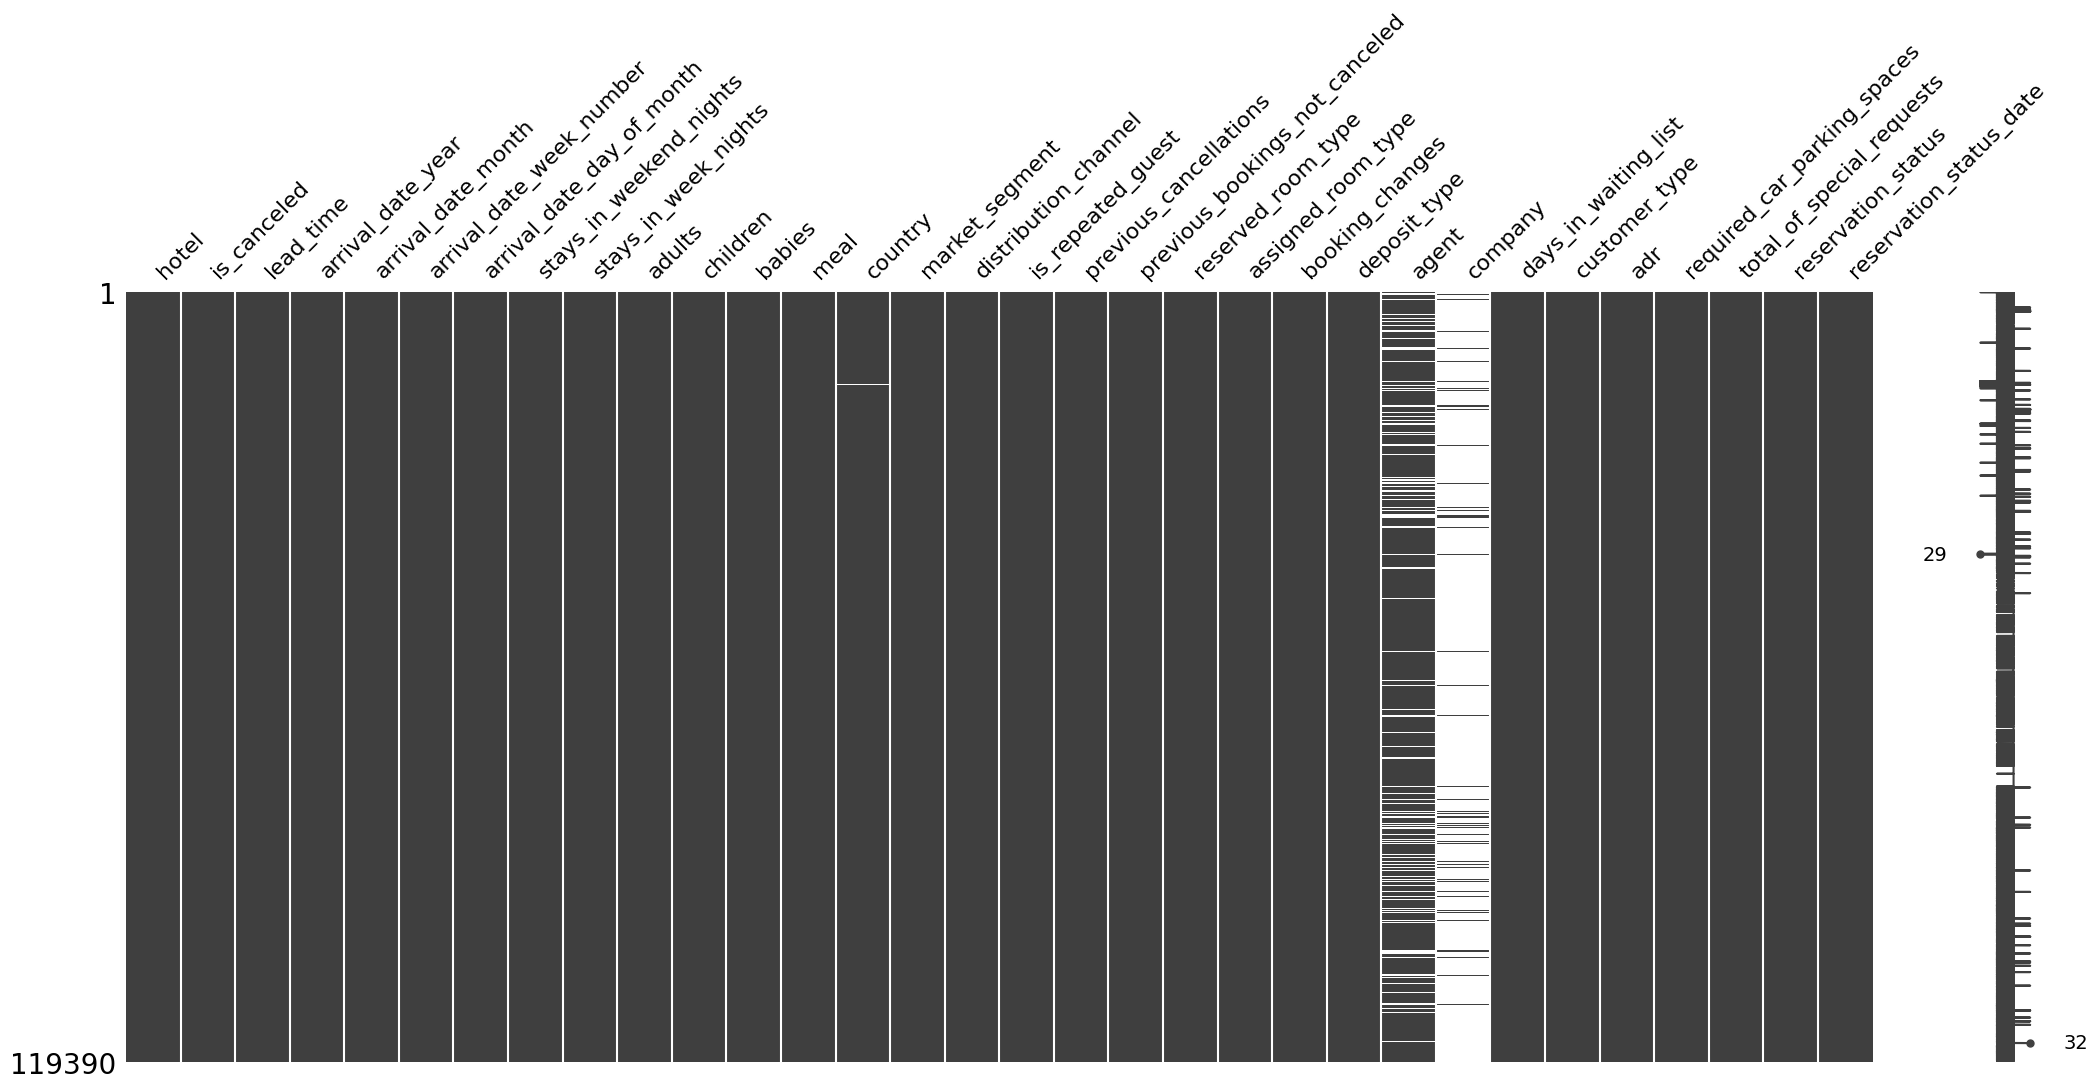

In [12]:
# Visualize missing val
msno.matrix(df)
plt.show()

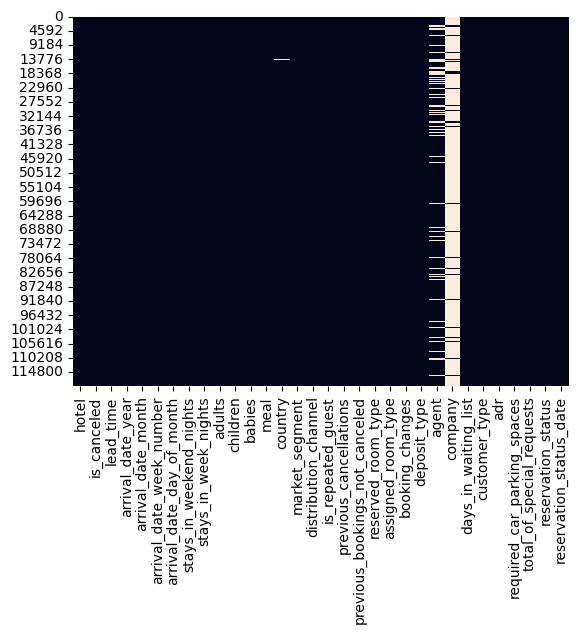

In [13]:
# Heatmap
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)
plt.show()

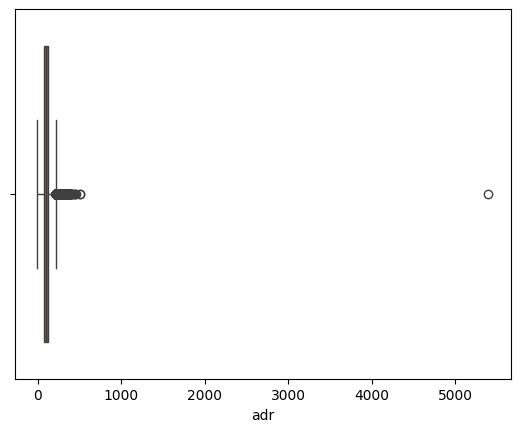

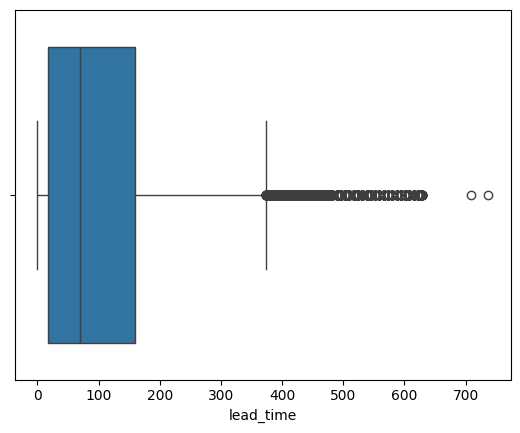

In [14]:
# Box Plot
sns.boxplot(x=df['adr'])
plt.show()

sns.boxplot(x=df['lead_time'])
plt.show()

#Report
##1-There are a lot of missing in the **agents** and  **company**

##2-There are a few missing in **country**

##3-There are very few missing in  **children**

##4-Outliers are clearly visible in the ADR (very large values)

##5-There are likely to be duplicates

#Phase 2: Data Cleaning

In [17]:
df["company"].fillna(0, inplace=True)
df["agent"].fillna(0, inplace=True)
df["country"].fillna(df["country"].mode()[0], inplace=True)
df["children"].fillna(df["children"].median(), inplace=True)

/tmp/ipython-input-4212196454.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["company"].fillna(0, inplace=True)
/tmp/ipython-input-4212196454.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.met

In [18]:
df.drop_duplicates(inplace=True) # Remove Duplicates

In [19]:
df["adr"] = df["adr"].apply(lambda x: 1000 if x > 1000 else x) # Outliers

In [20]:
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"]) #Fix Data Type

#Phase 3: Feature Engineering & Preprocessing

In [21]:
# Create new Features
df["total_guests"] = df["adults"] + df["children"] + df["babies"]
df["total_nights"] = df["stays_in_weekend_nights"] + df["stays_in_week_nights"]
df["is_family"] = df["children"].apply(lambda x: 1 if x > 0 else 0)

In [22]:
df = pd.get_dummies(df, columns=["meal", "market_segment"], drop_first=True)

# country: frequency encoding
country_counts = df["country"].value_counts().to_dict()
df["country_enc"] = df["country"].map(country_counts)

In [23]:
df.drop(["reservation_status", "reservation_status_date"], axis=1, inplace=True) #Data Leakage

In [24]:
#Train-Test Split
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42)